# Bayesian Nash Equilibrium Against Malicious Users

The objective of this notebook is to demonstrate how Bayes Theorem can help to calculate the probability of a user to be malicious, and how Game Theory's Nash Equilibrium can be used to draw a line between two strategies: block or allow.

To demonstrate this, we will use the context of a web site that has a large majority of legitimate users, and very few users who try to abuse it.

## Nash Equilibrium: Deciding which strategy to use, and when.

### Components of our game

In Game Theory, we need `Players`, `Strategies` and `Payoffs`.

Because we are adding Bayes on top of this, we  need to add two elements to the Players:
* Players
    * `Type`
    * `Common Prior Belief`
* Strategies 
* Payoffs  

## The Game

This is a game of Incomplete Information. 

(TODO) fix this graph
A Type 

| | Left | Right|  
| -- | -- | -- |   
| up | 1,2 | 2,3 | 
| down | 3,4 | 5,6 |  

B Type

| | Left | Right |
| -- | -- | -- |
| up | 4,3 | 3,2 |
| down | 7,4 | 4,2 |

### The Players Types
Player 1 represents each of our users: As player 2, we know that Player 1 can be of two types. But we don't know which one.
    * Player 2: A Type: Happy User, with probability p
    * Player 2: B Type: Vilain User, with probability 1-p

Player 2 (the web site maintainers), and we are good, of course. And our users knows that.

### Common Prior Belief
About the `Common Prior Belief` now. By experience, Player 2 knows (or at least have an idea of) the probability of a user of being happy or vilain.
- Player 1 knows that Player 2 knows that player 1 can be a Happy User with probability p, or a Vilain with probability 1-p.
- Player 2 knows that Player 1 knows that player 2 knows that player 1 can be happy or vilain
- Player 1 knows that player 2 knows that Player 1 knows that player 2 knows that player 1 can be happy or vilain
- And so on. All this to confirm that no player is taking the other player for an idiot.

### Strategies



In [1]:
#Vulnerability
vulnerability = 'Weak authentication mechanism'
risks = ['Account Takeover', 'fraudulent transaction', 'frauds']

In [47]:
# Threat Agent Factors

# Skill level
# How technically skilled is this group of threat agents? 
# * No technical skills (1), 
# * some technical skills (3), 
# * advanced computer user (5), 
# * network and programming skills (6), 
# * security penetration skills (9),
skill_level = 1
skill_level_weight = 0.25

# Motive
# How motivated is this group of threat agents to find and exploit this vulnerability? 
# * Low or no reward (1), possible reward (4), high reward (9)
motive = 4
motive_weight = 0.25

# Opportunity
# What resources and opportunities are required for this group of threat agents to find and exploit this vulnerability?
# * Full access or expensive resources required (0), 
# * special access or resources required (4), 
# * some access or resources required (7), 
# * no access or resources required (9)
opportunity = 1
opportunity_weight = 0.25

# Size
# How large is this group of threat agents? 
# * Developers (2), 
# * system administrators (2), 
# * intranet users (4), 
# * partners (5), 
# * authenticated users/customers(6), 
# * anonymous Internet users (9)
size = 2
size_weight = 0.25

threat_agent_factors = skill_level * skill_level_weight + motive * motive_weight + opportunity * opportunity_weight + size * size_weight / (skill_level_weight + motive_weight + opportunity_weight + size_weight)

print('Threat Agent Factor: {}'.format(threat_agent_factors))

Threat Agent Factor: 2.0


In [46]:
# Vulnerability Factors

# Ease_of discovery
# How easy is it for this group of threat agents to discover this vulnerability? 
# * Practically impossible (1), 
# * difficult (3), 
# * easy (7), 
# * automated tools available (9)
ease_of_discovery = 1
ease_of_discovery_weight = 0.25

# Ease of exploit
# How easy is it for this group of threat agents to actually exploit this vulnerability? 
# Theoretical (1), difficult (3), easy (5), automated tools available (9)
ease_of_exploit = 1
ease_of_exploit_weight = 0.25

# Awareness
# How well known is this vulnerability to this group of threat agents? 
# Unknown (1), hidden (4), obvious (6), public knowledge (9)
awareness = 4
awareness_weight = 0.25

# Intrusion detection
# How likely is an exploit to be detected? 
# Active detection in application (1), logged and reviewed (3), logged without review (8), not logged (9)
intrusion_detection = 2
intrusion_detection_weight = 0.25

vulnerability_factors = (ease_of_discovery * ease_of_discovery_weight + ease_of_exploit * ease_of_exploit_weight + awareness * awareness_weight + intrusion_detection * intrusion_detection_weight) / (ease_of_discovery_weight + ease_of_exploit_weight + awareness_weight + intrusion_detection_weight)

print('Vulnerability Factors: {}'.format(vulnerability_factors))

Vulnerability Factors: 2.0


In [4]:
# Technical Impact Factors

# Loss of confidentiality
# How much data could be disclosed and how sensitive is it? 
# * Minimal non-sensitive data disclosed (2), 
# * minimal critical data disclosed (6), 
# * extensive non-sensitive data disclosed (6), 
# * extensive critical data disclosed (7), 
# * all data disclosed (9)
loss_of_confidentiality = 4
loss_of_confidentiality_weight = 0.25

# Loss of integrity
# How much data could be corrupted and how damaged is it? 
# * Minimal slightly corrupt data (1), 
# * minimal seriously corrupt data (3), 
# * extensive slightly corrupt data (5), 
# * extensive seriously corrupt data (7), 
# * all data totally corrupt (9)
loss_of_integrity = 3
loss_of_integrity_weight = 0.25

# Loss of availability
# How much service could be lost and how vital is it? 
# * Minimal secondary services interrupted (1), 
# * minimal primary services interrupted (5), 
# * extensive secondary services interrupted (5), 
# * extensive primary services interrupted (7), 
# * all services completely lost (9)
loss_of_availability = 2
loss_of_availability_weight = 0.25

# Loss of accountability
# Are the threat agents' actions traceable to an individual? 
# * Fully traceable (1), possibly traceable (7), completely anonymous (9)
loss_of_accountability = 2
loss_of_accountability_weight = 0.25

technical_impact_factors = (loss_of_confidentiality * loss_of_confidentiality_weight + loss_of_integrity * loss_of_integrity_weight + loss_of_availability * loss_of_availability_weight + loss_of_accountability * loss_of_accountability_weight) / (loss_of_confidentiality_weight+loss_of_integrity_weight+loss_of_availability_weight+loss_of_accountability_weight)

print('Technical Impact Factors: {}'.format(technical_impact_factors))

Technical Impact Factors: 2.75


In [5]:
# Business Impact Factors

# Financial Damage
# * How much financial damage will result from an exploit? 
# * Less than the cost to fix the vulnerability (1), 
# * minor effect on annual profit (3), 
# * significant effect on annual profit (7), 
# * bankruptcy (9)
financial_damage = 3
financial_damage_weight = 0.25


# Reputation damage
# Would an exploit result in reputation damage that would harm the business? 
# * Minimal damage (1), 
# * Loss of major accounts (4), 
# * loss of goodwill (5),
# * brand damage (9)
reputation_damage = 7
reputation_damage_weight = 0.25

# Non-compliance
# * How much exposure does non-compliance introduce?
# * Minor violation (2), clear violation (5), high profile violation (7)
non_compliance = 4
non_compliance_weight = 0.25

# Privacy violation
# How much personally identifiable information could be disclosed? 
# * One individual (3), hundreds of people (5), thousands of people (7), millions of people (9)
privacy_violation = 3
privacy_violation_weight = 0.25

business_impact_factors = (financial_damage * financial_damage_weight + reputation_damage * reputation_damage_weight + non_compliance * non_compliance_weight + privacy_violation * privacy_violation_weight) / (financial_damage_weight + reputation_damage_weight + non_compliance_weight + privacy_violation_weight)

print('Business Impact Factors: {}'.format(technical_impact_factors))

Business Impact Factors: 2.75


In [6]:
# Countermeasure Costs

# Development Time
# How long will it take to develop the countermeasure? 
# * One person less than a week (1), 
# * small team less then a month (3), 
# * project less than 3 months (6), 
# * major reform more than 6 months (9)
development_time = 2
development_time_weight = 0.1

# 3rd Party Service/Solutions
# Cost of 3rd party services and/or solutions?
# * Minor costs (2), 
# * One time moderate acquisition costs (4), 
# * Moderate acquisition and ongoing support/license costs (6),
# * Major Acquisition and ongoing support/license costs (9)
external_support = 7
external_support_weight = 0.3

# Operation Time
# How many people will be required to operate the countermeasures? 
# * Automated, minor operation (1),
# * Once a week (2),
# * Half time of one staff (4),
# * Priority of few staffs (7), 
# * full team full time (9)
operation_time = 6
operation_time_weight = 0.4

# Technical Debt
# How much this countermeasure will make the system hard to maintain?
# * Minor debt (3), 
# * few dependencies, moderate modifications (6)
# * Major dependencies and Architecture change (9)
technical_debt = 6
technical_debt_weight = 0.2

counteremasure_costs = (development_time * development_time_weight + external_support * external_support_weight + operation_time * operation_time_weight + technical_debt * technical_debt_weight) / (development_time_weight + external_support_weight + operation_time_weight + technical_debt_weight)

print('Countermeasure Costs: {}'.format(counteremasure_costs))

Countermeasure Costs: 5.900000000000001


In [54]:
# Classification Impact

# Loss of sales
# How much sales could be lost if we block a legitimate customer? 
# * 1000¥ (1), 10,000¥ (3), 50,000¥ (7), 100,000 (9)
loss_of_sales_AType = 1
loss_of_sales_BType = 9
loss_of_sales_weight = 0.2

# Loss of customer
# How many legitimiate customers are we likely to lose? 
# Customers will come back (1), 1% will not come back (3), 10% will not come back (7), 50% will not come back (9)
loss_of_customer_AType = 1
loss_of_customer_BType = 9
loss_of_customer_weight = 0.2

# Bad Publicity	0.4
# What kind of coverage will we get if we block the users?
# * private complains (1), Complains on twitter without hashtag (3), Complains #company (6), National News coverage (9)
bad_publicity_AType = 0
bad_publicity_BType = 9
bad_publicity_weight = 0.4

# CS Calls	0.2
# Impact on the CS team for support: 
# one per day (1), less than 5 per day (3), 20 or more per day (5), 100 or more per day (7) 1000 or more per day (9)
customer_service_calls_AType = 0
customer_service_calls_BType = 8
customer_service_calls_weight = 0.2
        
classification_impact_AType = (loss_of_sales_AType * loss_of_sales_weight) + (loss_of_customer_AType  * loss_of_customer_weight) + (bad_publicity_AType * bad_publicity_weight) + (customer_service_calls_AType * customer_service_calls_weight) / (loss_of_sales_weight + loss_of_customer_weight + bad_publicity_weight + customer_service_calls_weight)
classification_impact_BType = (loss_of_sales_BType * loss_of_sales_weight) + (loss_of_customer_BType  * loss_of_customer_weight) + (bad_publicity_BType * bad_publicity_weight) + (customer_service_calls_BType * customer_service_calls_weight) / (loss_of_sales_weight + loss_of_customer_weight + bad_publicity_weight + customer_service_calls_weight)


print('Classification Impact if Player1 is A Type: {}'.format(classification_impact_AType))
print('Classification Impact if Player1 is B Type: {}'.format(classification_impact_BType))

Classification Impact if Player1 is A Type: 0.4
Classification Impact if Player1 is B Type: 8.8


In [10]:
%load_ext autoreload
%autoreload 2

import nashpy as nash
import numpy as np
# from graphviz_helper import render_game

In [81]:
strategy = {
    'player1': ['honest', 'abuse'],
    'player2': ['block', 'serve']
}

player1AType = np.array([
    [ 
        technical_impact_factors, # honest/serve: player1 can learn
        -1 * (threat_agent_factors + vulnerability_factors) / 2 # honest/block: Waste of talent and time
    ], 
    [
        threat_agent_factors + vulnerability_factors, # abuse/serve: (player1 sweet spot): profit, depending on the difficulty
        -1 * threat_agent_factors # abuse/block: Waste of time for player1
    ]
])
player2AType = np.array([
    [
        classification_impact_AType, # honest/block: player2 prevents the attacker from learning
        -1 * classification_impact_AType #honest/serve: makes it harder for player2 to identify normal/dishonest actions
    ], 
    [
        counteremasure_costs, # abuse/block: prevent the risk 
        -1 * (technical_impact_factors + business_impact_factors) # abuse/serve: failure to prevent the risk
    ]
])

player1BType = np.array([
    [
        -1 * classification_impact_BType, # honest/block: player1 can't enjoy our site, and will probably be annoyed
        classification_impact_BType, # honest/serve: player1 is happy.
        
    ], 
    [
        -1 * classification_impact_AType, # abuse/block: player1 is not acting normally. 
        -1 * (counteremasure_costs + business_impact_factors)/2 # abuse/serve: player1 is not acting normally, and not beling blocked
    ]
])
player2BType = np.array([
    [
        -1 * (classification_impact_BType + counteremasure_costs), # honest/block: worst case for player2, blocking good customers
        classification_impact_BType, # honest/serve player2 sweet spot: profit
    ], 
    [
        -1 * (classification_impact_AType + business_impact_factors + counteremasure_costs)/2, # player2 can't distinguish between A Type and B Type
        -1 * (counteremasure_costs + business_impact_factors)/2
    ]
])

print(player1AType)
print(player2AType)
print(player1BType)
print(player2BType)

[[ 2.75 -2.  ]
 [ 4.   -2.  ]]
[[ 0.4 -0.4]
 [ 5.9 -7. ]]
[[-8.8    8.8  ]
 [-0.4   -5.075]]
[[-14.7     8.8  ]
 [ -5.275  -5.075]]


In [34]:
strategy = {
    'player1': ['up', 'down'],
    'player2': ['left', 'right']
}

player1AType = np.array([
    [3,1], 
    [4,2]
])
player2AType = np.array([
    [4,0], 
    [3,0]
])

player1BType = np.array([
    [6,0], 
    [5,-1]
])
player2BType = np.array([
    [2,4], 
    [1,4]
])

print(player1AType)
print(player2AType)
print(player1BType)
print(player2BType)

[[3 1]
 [4 2]]
[[4 0]
 [3 0]]
[[ 6  0]
 [ 5 -1]]
[[2 4]
 [1 4]]


In [77]:
def find_equilibria(p1TypeGame, strategy, player1Payoff, player2Payoff):
    players = list(strategy.keys())
    equilibria = p1TypeGame.support_enumeration()
    choices = {players[0]: [], players[1]: []}
    count = 0
    for eq in equilibria:
        count += 1
        print('Equilibria {}'.format(count))
        bestP1 = np.argmax(eq[0])
        bestP2 = np.argmax(eq[1])
        notBestP1 = np.argmin(eq[0])
        notBestP2 = np.argmin(eq[1])
        
        print("'{}' prefered strategy '{}' with probability {:.2f}. Payoffs: most likely {}, otherwise {}".format(
                players[0], strategy[players[0]][bestP1], eq[bestP1][0], player1Payoff[bestP1][bestP2], player1Payoff[notBestP1][bestP2]
            ))
        print("'{}' prefered strategy '{}' with probability {:.2f}. Payoffs: most likely {}, otherwise {}".format(
                players[1], strategy[players[1]][bestP2], eq[1][bestP2], player2Payoff[bestP1][bestP2], player2Payoff[bestP1][notBestP2]
            ))

        choices[players[0]].append({
            'strategy': strategy[players[0]][bestP1], 
            'probability': eq[0][bestP1],
            'idx': bestP1,
            'payoffs': [player1Payoff[bestP1][bestP2], player1Payoff[notBestP1][bestP2]]
        })
        choices[players[1]].append({
            'strategy': strategy[players[1]][bestP2], 
            'probability': eq[0][bestP1],
            'idx': bestP2,
            'payoffs': [player2Payoff[bestP1][bestP2], player2Payoff[bestP1][notBestP2]]
        })
    return choices

In [78]:
aType = nash.Game(player1AType, player2AType)
bType = nash.Game(player1BType, player2BType)

print('Nash Equilibria')

resultAType = find_equilibria(aType, strategy, player1AType, player2AType)
resultBType = find_equilibria(bType, strategy, player1BType, player2BType)

# print(resultBType)
a = resultAType['player2'][0]['payoffs'][0] # A Type, first equilibrium, best outcome
b = resultAType['player2'][0]['payoffs'][1] # A Type, first equilibrium, worse outcome
c = resultBType['player2'][0]['payoffs'][1] # A Type, first equilibrium, worse outcome
d = resultBType['player2'][0]['payoffs'][0] # A Type, first equilibrium, best outcome
p = (d-c)/(a-c+d-b)

print('')
print('Player2 should play "{}" if he believes player1 will play "{}" with probability p={}'.format(
    strategy['player2'][resultAType['player2'][0]['idx']], 
    strategy['player1'][resultAType['player1'][0]['idx']], 
    p)
     )

Nash Equilibria
Equilibria 1
'player1' prefered strategy 'abuse' with probability 1.00. Payoffs: most likely 4.0, otherwise 2.75
'player2' prefered strategy 'block' with probability 1.00. Payoffs: most likely 5.900000000000001, otherwise -7.0
Equilibria 1
'player1' prefered strategy 'honest' with probability 1.00. Payoffs: most likely 8.8, otherwise -4.4
'player2' prefered strategy 'serve' with probability 1.00. Payoffs: most likely 8.8, otherwise -14.700000000000003
Equilibria 2
'player1' prefered strategy 'abuse' with probability 1.00. Payoffs: most likely -0.4, otherwise -8.8
'player2' prefered strategy 'block' with probability 1.00. Payoffs: most likely -0.4, otherwise -2.9500000000000006
Equilibria 3
'player1' prefered strategy 'abuse' with probability 0.61. Payoffs: most likely -0.4, otherwise -8.8
'player2' prefered strategy 'block' with probability 0.61. Payoffs: most likely -0.4, otherwise -2.9500000000000006

Player2 should play "block" if he believes player1 will play "abuse

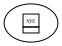

In [11]:
# g = render_game(players, types, beliefs, strategies, payoffs)

# g